In [49]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import svm
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix 
from keras.layers import Dense, Activation
from keras.models import Sequential

In [7]:
Out = pd.read_excel('Data_Folder/4_12_outsided_wearable.xlsx',header=0,index_col=0)
In = pd.read_excel('Data_Folder/Demo4_20/4_20_wearable_inside.xlsx',header=0,index_col=0)

In [8]:
In = In.resample('1T',on='#VALUE!').mean()
Out = Out.fillna(method='ffill')
In = In.fillna(method='ffill')
Out = Out.resample('1T',on='time').mean()
Out.drop(columns=['Time(s)'], inplace=True)
In.drop(columns=['Time(s)'], inplace=True)
Out.index = range(Out.shape[0])
In.index = range(In.shape[0])
In = In.iloc[:500,:]

In [9]:
In_label = np.ones((In.shape[0],), dtype=int)
Out_label = np.zeros((Out.shape[0],), dtype=int)
In['label'] = In_label
Out['label'] = Out_label

In [10]:
DF = pd.concat([In,Out],axis=0)
DF = shuffle(DF)

### SVC, NuSVC, LinearSVC

In [36]:
X_train, X_test, y_train, y_test = train_test_split(DF.iloc[:,:6], DF.iloc[:,6:], test_size = 0.2, random_state = 0)
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [37]:
y_pred = classifier.predict(X_test)

print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  


[[198   0]
 [  0 102]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       198
           1       1.00      1.00      1.00       102

   micro avg       1.00      1.00      1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [38]:
classifier2 = svm.SVC(kernel='poly',degree=2)
classifier2.fit(X_train,y_train)
y_pred = classifier2.predict(X_test)

print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  

[[197   1]
 [  0 102]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       198
           1       0.99      1.00      1.00       102

   micro avg       1.00      1.00      1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [39]:
"""the result is not good as the previous two"""
classifier3 = svm.SVC(kernel='rbf')
classifier3.fit(X_train,y_train)
y_pred = classifier3.predict(X_test)

#print(confusion_matrix(y_test,y_pred))  
#print(classification_report(y_test,y_pred))  

In [40]:
'''the result is not good as the previous two'''
classifier4 = svm.SVC(kernel='sigmoid')
classifier4.fit(X_train,y_train)
y_pred = classifier4.predict(X_test)

#print(confusion_matrix(y_test,y_pred))  
#print(classification_report(y_test,y_pred))

In [41]:
mixed = pd.read_csv('Data_Folder/Demo3_5/Wearable_label.csv')
mixed.dropna(inplace=True)
mixed = shuffle(mixed)
mixed.drop(columns=['time'],inplace=True)

In [42]:
y_pred = classifier.predict(mixed.iloc[:,:6])
y_test_mixed = mixed.iloc[:,6:]
print(confusion_matrix(y_test_mixed,y_pred))  
print(classification_report(y_test_mixed,y_pred))  

[[ 6  5]
 [15 29]]
              precision    recall  f1-score   support

         0.0       0.29      0.55      0.37        11
         1.0       0.85      0.66      0.74        44

   micro avg       0.64      0.64      0.64        55
   macro avg       0.57      0.60      0.56        55
weighted avg       0.74      0.64      0.67        55



In [43]:
y_pred = classifier2.predict(mixed.iloc[:,:6])
y_test_mixed = mixed.iloc[:,6:]
print(confusion_matrix(y_test_mixed,y_pred))  
print(classification_report(y_test_mixed,y_pred))  

[[ 6  5]
 [27 17]]
              precision    recall  f1-score   support

         0.0       0.18      0.55      0.27        11
         1.0       0.77      0.39      0.52        44

   micro avg       0.42      0.42      0.42        55
   macro avg       0.48      0.47      0.39        55
weighted avg       0.65      0.42      0.47        55



In [44]:
y_test.shape

(300, 1)

### deep learning

In [58]:
model = Sequential()
model.add(Dense(60, input_dim=6, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
history = model.fit(X_train, y_train,validation_data=(X_test,y_test), batch_size = 10, epochs = 50)
scores = model.evaluate(X_test,y_test,batch_size = 10)
#print(confusion_matrix(y_test,y_pred))  
#print(classification_report(y_test,y_pred))  

Train on 1199 samples, validate on 300 samples
Epoch 1/50
1199/1199 [==============================] - 1s 485us/step - loss: 1.3152 - acc: 0.9174 - val_loss: 1.1705 - val_acc: 0.9267
Epoch 2/50
1199/1199 [==============================] - 0s 161us/step - loss: 1.1036 - acc: 0.9308 - val_loss: 1.1691 - val_acc: 0.9267
Epoch 3/50
1199/1199 [==============================] - 0s 166us/step - loss: 1.0903 - acc: 0.9316 - val_loss: 1.1691 - val_acc: 0.9267
Epoch 4/50
1199/1199 [==============================] - 0s 154us/step - loss: 1.0903 - acc: 0.9316 - val_loss: 1.1691 - val_acc: 0.9267
Epoch 5/50
1199/1199 [==============================] - 0s 156us/step - loss: 1.0903 - acc: 0.9316 - val_loss: 1.1691 - val_acc: 0.9267
Epoch 6/50
1199/1199 [==============================] - 0s 155us/step - loss: 1.0903 - acc: 0.9316 - val_loss: 1.1691 - val_acc: 0.9267
Epoch 7/50
1199/1199 [==============================] - 0s 175us/step - loss: 1.0903 - acc: 0.9316 - val_loss: 1.1691 - val_acc: 0.9267
E

In [59]:
scores

[1.1691122824239715, 0.9266666571299235]

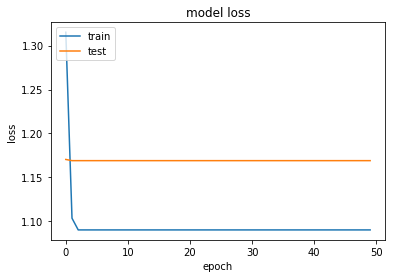

In [60]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()